In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import pyranges as pr
import itertools
from collections import defaultdict
import os

import sys
sys.path.append("/Genomics/kocherlab/bjarnold/STARRseq/code/notebooks")
import functions as fn



before filtering
115
87
120
141
85
117
114
113
94
84
171
102
69
77
120
88
148
101
108
89
108
111
91
125
83
120
115
108
97
126
50
62
132
101
74
59
128
116
66
164
110
142
103
90
147
69
113
103
73
69
57
101
101
109
99
87
114
117
81
134
70
97
88
108
124
120
124
111
71
75
139
158
119
45
121
93
132
163
93
99
149
88
73
85
66
118
117
78
164
141
81
67
124
36
120
145
66
132
120
149
after filtering
112
84
117
138
82
114
111
110
91
81
168
99
66
74
117
85
145
98
105
86
105
108
88
122
80
117
112
105
94
123
29
51
129
98
71
50
125
113
60
161
107
139
100
87
144
66
110
100
70
66
18
98
98
106
96
84
111
114
78
131
67
94
85
105
121
117
121
108
68
72
136
155
116
33
118
90
129
160
90
96
146
85
70
82
63
115
114
75
161
138
78
64
121
7
117
142
63
129
117
146
112 112
84 84
117 117
138 138
82 82
114 114
111 111
110 110
91 91
81 81
168 168
99 99
66 66
74 74
117 117
85 85
145 145
98 98
105 105
86 86
105 105
108 108
88 88
122 122
80 80
117 117
112 112
105 105
94 94
123 123
29 29
51 51
129 129
98 98
71 71
50 50
125 1

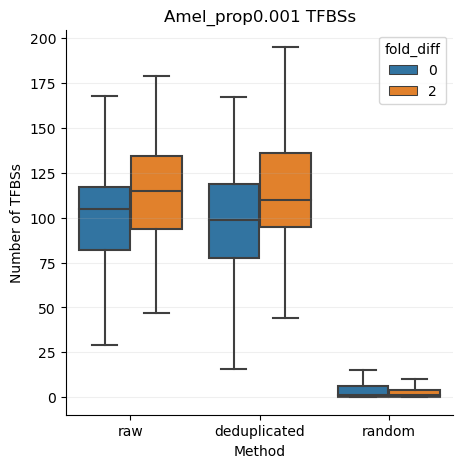

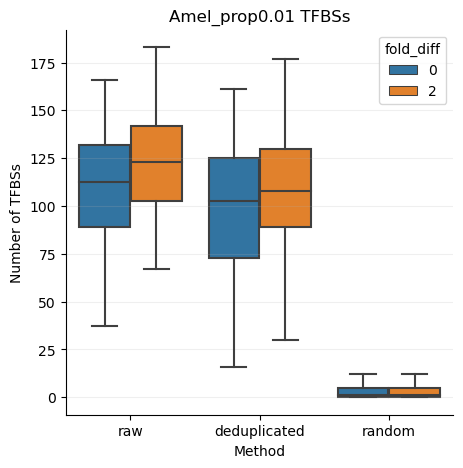

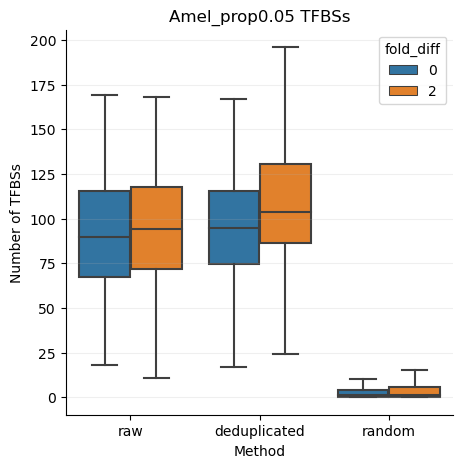

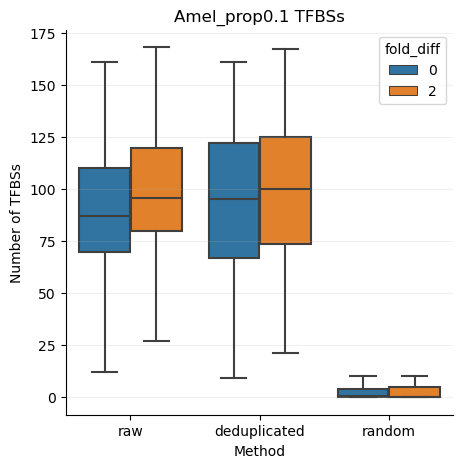

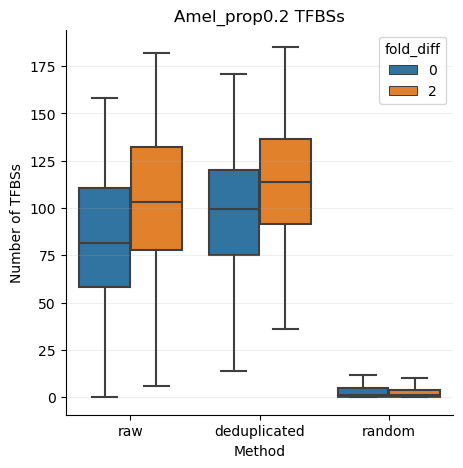

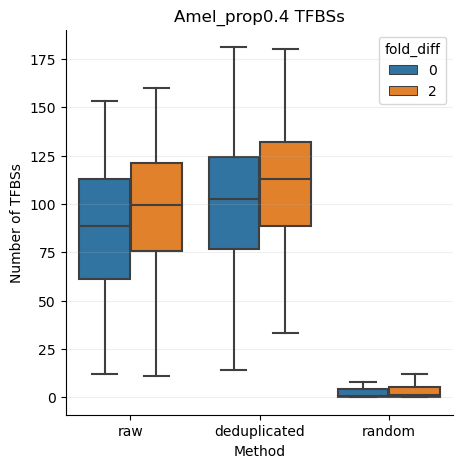

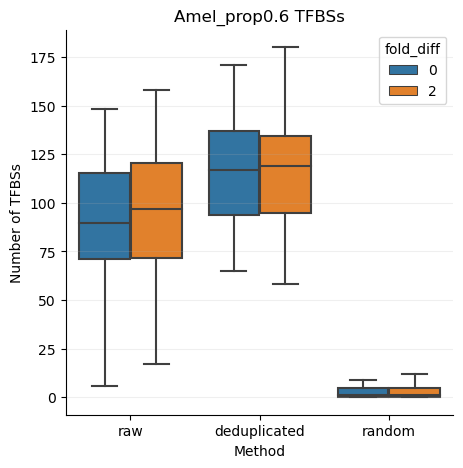

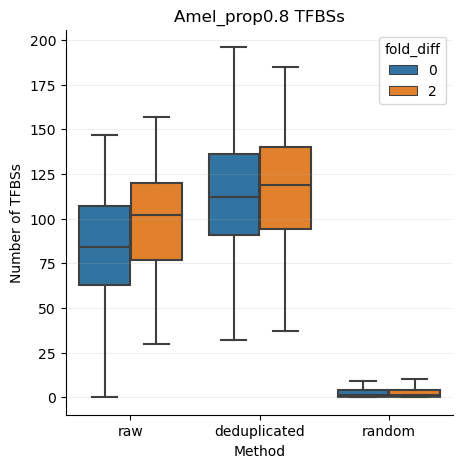

In [2]:
# SPECIES_LIST = ['Nmel', 'Lbal', 'Hqua', 'Hlig', 'Amel', 'Avir', 'Aaur', 'Apur', 'Bimp', 'BimpMET', 'BimpDMSO', 'Lvie', 'Lzep']
# SPECIES_LIST = ['Dmel']
SPECIES_LIST = ['Amel_prop0.001', 'Amel_prop0.01', 'Amel_prop0.05', 'Amel_prop0.1', 'Amel_prop0.2', 'Amel_prop0.4', 'Amel_prop0.6', 'Amel_prop0.8']
min_biorep_support = 3

number_of_subsamples = 100
# eval_thresh = 1
qval_thresh = 0.1
columns = ["RANK","ID","ENR_RATIO", "EVALUE", "QVALUE"]


def filter_dfs(dfs, columns, thresh):
    for i,df in enumerate(dfs):
        df = df[columns]
        # df = df[df['EVALUE'] <= thresh].reset_index(drop=True)
        df = df[df['QVALUE'] <= thresh].reset_index(drop=True)
        df = df[df["ID"].notna()]
        dfs[i] = df
    return dfs

def get_num_TFBSs(dfs):
    TFBS = []
    TFBS_num = []
    for df in dfs:
        print(len(df), len(set(df["ID"].unique())))
        tfbs = set(df["ID"].unique())
        TFBS.append(tfbs)
        TFBS_num.append(len(tfbs))
    
    return TFBS_num


for species in SPECIES_LIST:

    if species != "Dmel":
        wd0=f"/Genomics/kocherlab/bjarnold/STARRseq/data/meme_suite/min_biorep_support_{min_biorep_support}/qval_0_folddiff_0/sea_output/{species}"
        wd2=f"/Genomics/kocherlab/bjarnold/STARRseq/data/meme_suite/min_biorep_support_{min_biorep_support}/qval_0_folddiff_2/sea_output/{species}"
    else:
        wd0=f"/Genomics/kocherlab/bjarnold/STARRseq/data/meme_suite/Dmel/qval_0_folddiff_0/sea_output/{species}"
        wd2=f"/Genomics/kocherlab/bjarnold/STARRseq/data/meme_suite/Dmel/qval_0_folddiff_2/sea_output/{species}"
    plot_dir = f"/Genomics/kocherlab/bjarnold/STARRseq/data/meme_suite/figs"

    raw_0_sea_dfs = [pd.read_csv(f'{wd0}/raw/rep{i}/sea.tsv', sep="\t") for i in range(number_of_subsamples)]
    dedup_0_sea_dfs = [pd.read_csv(f'{wd0}/dedup/rep{i}/sea.tsv', sep="\t") for i in range(number_of_subsamples)]
    random_0_sea_dfs = [pd.read_csv(f'{wd0}/random/rep{i}/sea.tsv', sep="\t") for i in range(number_of_subsamples)]

    raw_2_sea_dfs = [pd.read_csv(f'{wd2}/raw/rep{i}/sea.tsv', sep="\t") for i in range(number_of_subsamples)]
    dedup_2_sea_dfs = [pd.read_csv(f'{wd2}/dedup/rep{i}/sea.tsv', sep="\t") for i in range(number_of_subsamples)]
    random_2_sea_dfs = [pd.read_csv(f'{wd2}/random/rep{i}/sea.tsv', sep="\t") for i in range(number_of_subsamples)]

    print("before filtering")
    [print(len(raw)) for raw in raw_0_sea_dfs]

    raw_0_sea_dfs = filter_dfs(raw_0_sea_dfs, columns, qval_thresh)
    dedup_0_sea_dfs = filter_dfs(dedup_0_sea_dfs, columns, qval_thresh)
    random_0_sea_dfs = filter_dfs(random_0_sea_dfs, columns, qval_thresh)

    raw_2_sea_dfs = filter_dfs(raw_2_sea_dfs, columns, qval_thresh)
    dedup_2_sea_dfs = filter_dfs(dedup_2_sea_dfs, columns, qval_thresh)
    random_2_sea_dfs = filter_dfs(random_2_sea_dfs, columns, qval_thresh)

    print("after filtering")
    [print(len(raw)) for raw in raw_0_sea_dfs]




    results = defaultdict(list)
    results['raw'] = get_num_TFBSs(raw_0_sea_dfs)
    results['deduplicated'] = get_num_TFBSs(dedup_0_sea_dfs)
    results['random'] = get_num_TFBSs(random_0_sea_dfs)
    results['fold_diff'] = [0]*number_of_subsamples

    results['raw'].extend(get_num_TFBSs(raw_2_sea_dfs))
    results['deduplicated'].extend(get_num_TFBSs(dedup_2_sea_dfs))
    results['random'].extend(get_num_TFBSs(random_2_sea_dfs))

    results['fold_diff'].extend([2]*number_of_subsamples)

    for key in results:
        print(key, len(results[key]))

    results_df = pd.DataFrame.from_dict(results)

    results_df
    # melt results_df so that raw, deduplicated, and random are categorical variables
    results_df_melt = pd.melt(results_df, id_vars=['fold_diff'], value_vars=['raw', 'deduplicated', 'random'], var_name='method', value_name='num_TFBSs')

    # make paired boxplot of number of TFBSs, grouping boxplots by fold_diff
    fig, ax = plt.subplots(figsize=(5,5))
    sns.boxplot(data=results_df_melt, x='method', y='num_TFBSs', ax=ax, hue='fold_diff', showfliers=False)

    ax.set_ylabel("Number of TFBSs")
    ax.set_xlabel("Method")
    ax.set_title(f"{species} TFBSs")
    # add grid lines
    ax.grid(axis='y', linestyle='-', alpha=0.2)
    sns.despine()



    # save figure
    if species != "Dmel":
        plt.savefig(f"{plot_dir}/{species}_min_biorep_support_{min_biorep_support}.png", dpi=300, bbox_inches='tight')
    else:
        plt.savefig(f"{plot_dir}/{species}.png", dpi=300, bbox_inches='tight')


In [3]:
results_df
# melt results_df so that raw, deduplicated, and random are categorical variables
results_df_melt = pd.melt(results_df, id_vars=['fold_diff'], value_vars=['raw', 'deduplicated', 'random'], var_name='method', value_name='num_TFBSs')
results_df_melt



,fold_diff,method,num_TFBSs
0,0,raw,72
1,0,raw,91
2,0,raw,40
3,0,raw,64
4,0,raw,113
...,...,...,...
595,2,random,4
596,2,random,3
597,2,random,1
598,2,random,0


<Axes: xlabel='method', ylabel='num_TFBSs'>

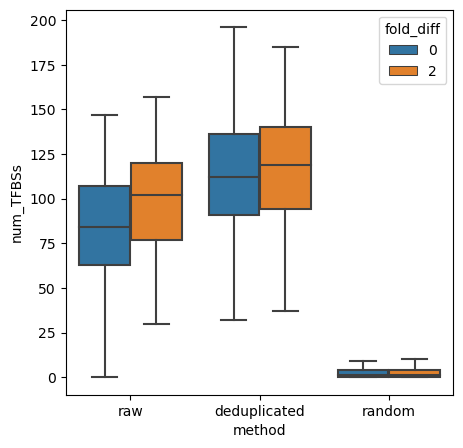

In [4]:

fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(data=results_df_melt, x='method', y='num_TFBSs', ax=ax, hue='fold_diff', showfliers=False)


before filtering
23
14
37
72
16
21
50
69
49
28
48
62
52
30
19
31
21
22
53
31
66
34
38
57
42
28
23
57
40
68
64
97
81
37
60
39
69
43
35
16
29
24
82
33
46
43
79
24
55
34
76
27
17
27
79
38
12
56
29
98
42
36
75
20
58
19
86
54
56
37
72
36
27
101
25
34
34
33
77
21
34
29
82
61
39
72
50
32
41
66
27
69
41
21
41
61
46
57
38
32
after filtering
3
0
5
69
2
0
35
66
10
0
21
39
0
3
2
9
0
2
2
6
48
10
10
9
2
7
2
46
16
56
59
94
78
6
46
4
46
3
9
2
0
0
79
11
17
5
76
0
22
6
73
5
0
0
76
2
1
22
0
95
15
2
69
2
31
6
83
11
30
7
69
10
5
98
0
10
3
0
73
0
0
5
79
46
4
69
7
4
0
63
2
43
3
2
4
55
6
36
0
11
3 3
0 0
5 5
69 69
2 2
0 0
35 35
66 66
10 10
0 0
21 21
39 39
0 0
3 3
2 2
9 9
0 0
2 2
2 2
6 6
48 48
10 10
10 10
9 9
2 2
7 7
2 2
46 46
16 16
56 56
59 59
94 94
78 78
6 6
46 46
4 4
46 46
3 3
9 9
2 2
0 0
0 0
79 79
11 11
17 17
5 5
76 76
0 0
22 22
6 6
73 73
5 5
0 0
0 0
76 76
2 2
1 1
22 22
0 0
95 95
15 15
2 2
69 69
2 2
31 31
6 6
83 83
11 11
30 30
7 7
69 69
10 10
5 5
98 98
0 0
10 10
3 3
0 0
73 73
0 0
0 0
5 5
79 79
46 46
4 4
69 

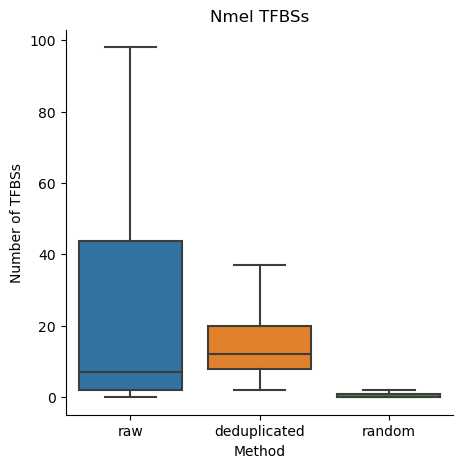

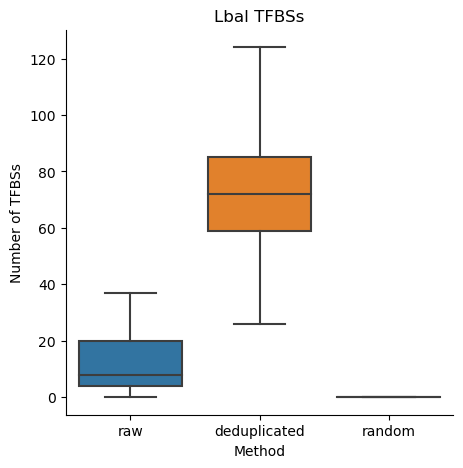

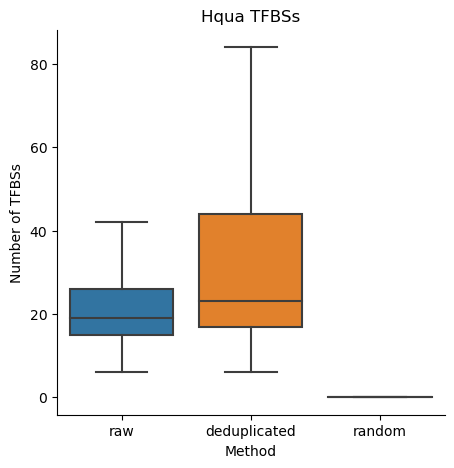

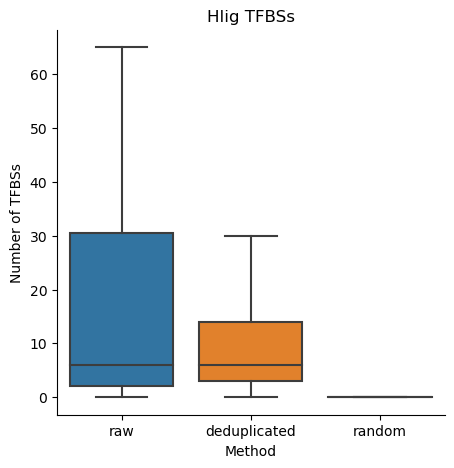

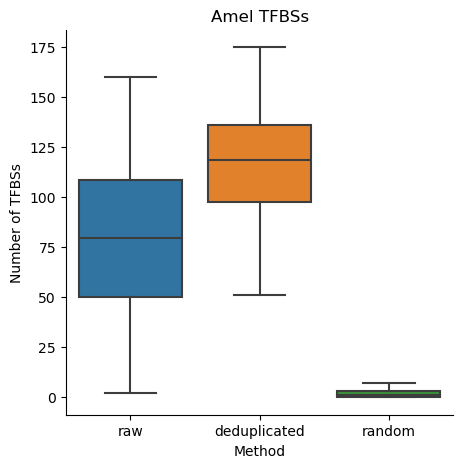

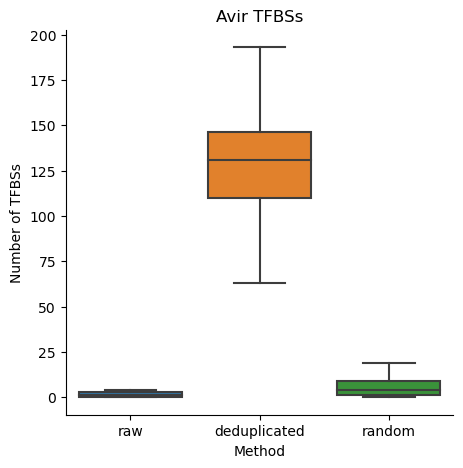

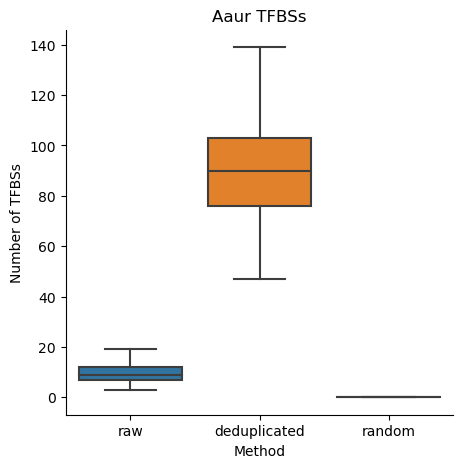

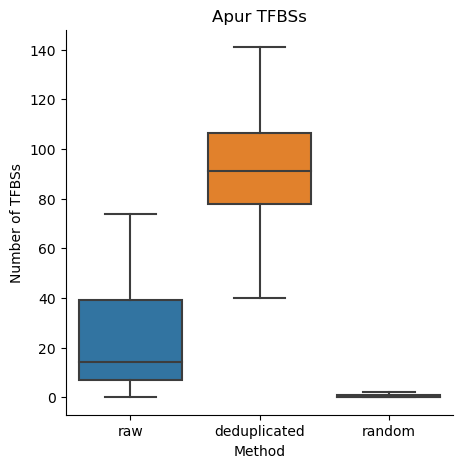

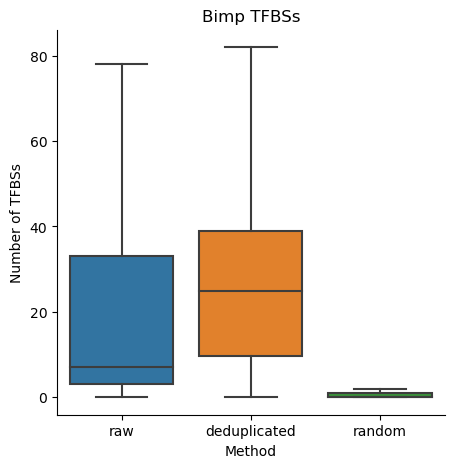

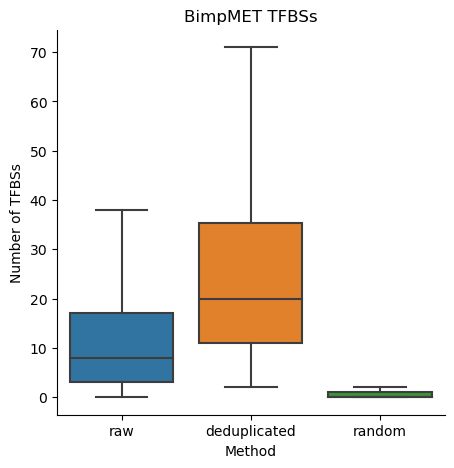

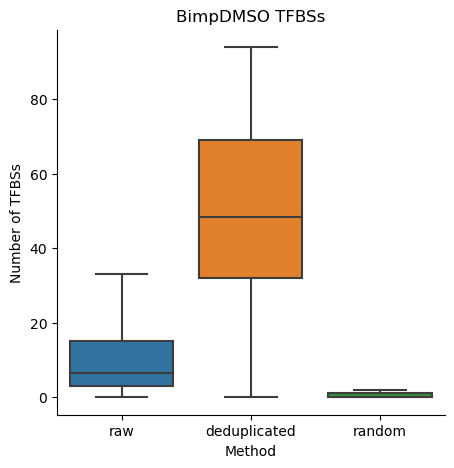

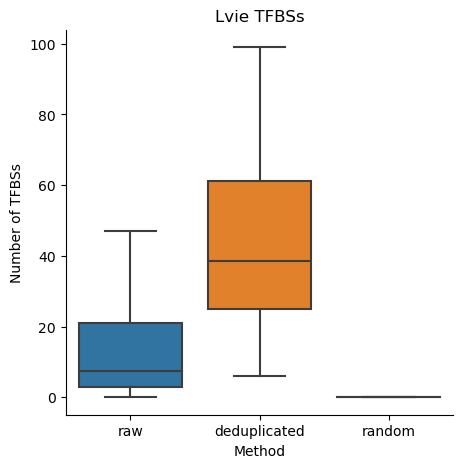

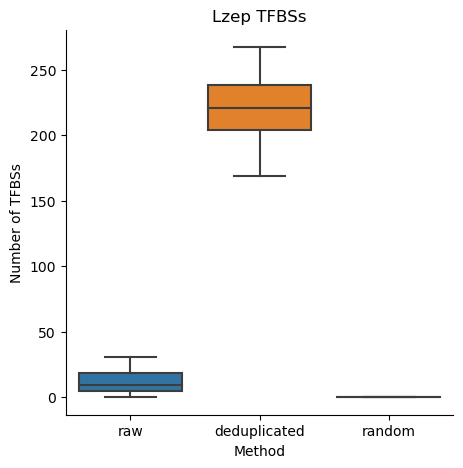

In [5]:
SPECIES_LIST = ['Nmel', 'Lbal', 'Hqua', 'Hlig', 'Amel', 'Avir', 'Aaur', 'Apur', 'Bimp', 'BimpMET', 'BimpDMSO', 'Lvie', 'Lzep']
# SPECIES_LIST = ['Dmel']
min_biorep_support = 2
fold_diff_thresh = 2
# base_dir = "/Genomics/kocherlab/bjarnold/STARRseq/data/meme_suite/sea_output/manually_curated_db_from_beryl"
# base_dir = "/Genomics/kocherlab/bjarnold/STARRseq/data/meme_suite/sea_output/JASPAR2022_CORE_insects_non-redundant_v2"
# base_dir = "/Genomics/kocherlab/bjarnold/STARRseq/data/meme_suite/sea_output/fly_factor_survey"
# base_dir=f"/Genomics/kocherlab/bjarnold/STARRseq/data/meme_suite/min_biorep_support_{min_biorep_support}/qval_0_folddiff_{fold_diff_thresh}/sea_output"

number_of_subsamples = 100
eval_thresh = 1
qval_thresh = 0.1
columns = ["RANK","ID","ENR_RATIO", "EVALUE", "QVALUE"]

# these files should have all reported TFBSs with E-value <= 10

# dedup_sea_df = pd.read_csv(f'{wd}/dedup/sea.tsv', sep="\t")
# dedup_sea_df = dedup_sea_df[columns]
# dedup_sea_df = dedup_sea_df[dedup_sea_df['EVALUE'] <= eval_thresh].reset_index(drop=True)
# dedup_sea_df = dedup_sea_df[dedup_sea_df["ID"].notna()]
# print(len(dedup_sea_df))


def filter_dfs(dfs, columns, thresh):
    for i,df in enumerate(dfs):
        df = df[columns]
        # df = df[df['EVALUE'] <= thresh].reset_index(drop=True)
        df = df[df['QVALUE'] <= thresh].reset_index(drop=True)
        df = df[df["ID"].notna()]
        dfs[i] = df
    return dfs

def get_num_TFBSs(dfs):
    TFBS = []
    TFBS_num = []
    for df in dfs:
        print(len(df), len(set(df["ID"].unique())))
        tfbs = set(df["ID"].unique())
        TFBS.append(tfbs)
        TFBS_num.append(len(tfbs))
    
    return TFBS_num


for species in SPECIES_LIST:

    if species != "Dmel":
        wd=f"/Genomics/kocherlab/bjarnold/STARRseq/data/meme_suite/min_biorep_support_{min_biorep_support}/qval_0_folddiff_{fold_diff_thresh}/sea_output/{species}"
    else:
        wd=f"/Genomics/kocherlab/bjarnold/STARRseq/data/meme_suite/Dmel/qval_0_folddiff_{fold_diff_thresh}/sea_output/{species}"
    plot_dir = f"/Genomics/kocherlab/bjarnold/STARRseq/data/meme_suite/figs"

    raw_sea_dfs = [pd.read_csv(f'{wd}/raw/rep{i}/sea.tsv', sep="\t") for i in range(number_of_subsamples)]
    dedup_sea_dfs = [pd.read_csv(f'{wd}/dedup/rep{i}/sea.tsv', sep="\t") for i in range(number_of_subsamples)]
    random_sea_dfs = [pd.read_csv(f'{wd}/random/rep{i}/sea.tsv', sep="\t") for i in range(number_of_subsamples)]

    print("before filtering")
    [print(len(raw)) for raw in raw_sea_dfs]

    raw_sea_dfs = filter_dfs(raw_sea_dfs, columns, qval_thresh)
    dedup_sea_dfs = filter_dfs(dedup_sea_dfs, columns, qval_thresh)
    random_sea_dfs = filter_dfs(random_sea_dfs, columns, qval_thresh)

    print("after filtering")
    [print(len(raw)) for raw in raw_sea_dfs]

    # for i,raw in enumerate(raw_sea_dfs):
    #     raw = raw[columns]
    #     raw = raw[raw['EVALUE'] <= eval_thresh].reset_index(drop=True)
    #     raw = raw[raw["ID"].notna()]
    #     raw_sea_dfs[i] = raw

    # print("after filtering")
    # [print(len(raw)) for raw in raw_sea_dfs]


    # raw_sea_dfs[0]



    results = defaultdict(list)
    results['raw'] = get_num_TFBSs(raw_sea_dfs)
    results['deduplicated'] = get_num_TFBSs(dedup_sea_dfs)
    results['random'] = get_num_TFBSs(random_sea_dfs)


    results_df = pd.DataFrame.from_dict(results)

    # make boxplot of number of TFBSs
    fig, ax = plt.subplots(figsize=(5,5))
    sns.boxplot(data=results_df, ax=ax, showfliers=False)
    ax.set_ylabel("Number of TFBSs")
    ax.set_xlabel("Method")
    ax.set_title(f"{species} TFBSs")

    sns.despine()
    # save figure
    if species != "Dmel":
        plt.savefig(f"{plot_dir}/{species}_min_biorep_support_{min_biorep_support}_qval_0_folddiff_{fold_diff_thresh}.png", dpi=300, bbox_inches='tight')
    else:
        plt.savefig(f"{plot_dir}/{species}_qval_0_folddiff_{fold_diff_thresh}.png", dpi=300, bbox_inches='tight')
